In [14]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import netCDF4
import pyart
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy

In [15]:
MRR_read_in = Dataset('/Users/adamabdelhak/Downloads/MRR-Pro/mrr.nc')
MRR_read_in

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF/Radial
    version: 1.3
    title: METEK MRR Pro 1.2.5 Data
    institution: 
    references: 
    source: 
    history: 
    comment: 
    instrument_name: METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:  0515119169, Software:  MRR Pro 1.2.5
    site_name: cms-mrr-002
    field_names: Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectivity,N
    dimensions(sizes): time(5760), string_length(128), range(256), sweep(1), n_spectra(256), spectrum_n_samples(32)
    variables(dimensions): int32 volume_number(time), |S1 time_coverage_start(time, string_length), |S1 time_coverage_end(time, string_length), |S1 time_reference(time, string_length), |S1 instrument_type(time, string_length), float64 transfer_function(time, range), float64 calibration_constant(time), float64 latitude(time), float64 longitude(time), float64 altitude(time), float64 doppler_shift_spectrum(time), int32 sw

In [16]:
time = MRR_read_in['time'][:]
time = np.array(netCDF4.num2date(time, units = 'seconds since 2022-01-17 00:00:00'),dtype = 'datetime64[ns]')

In [27]:
reflectivity = MRR_read_in['Z'][:]
height = MRR_read_in['altitude'][:]

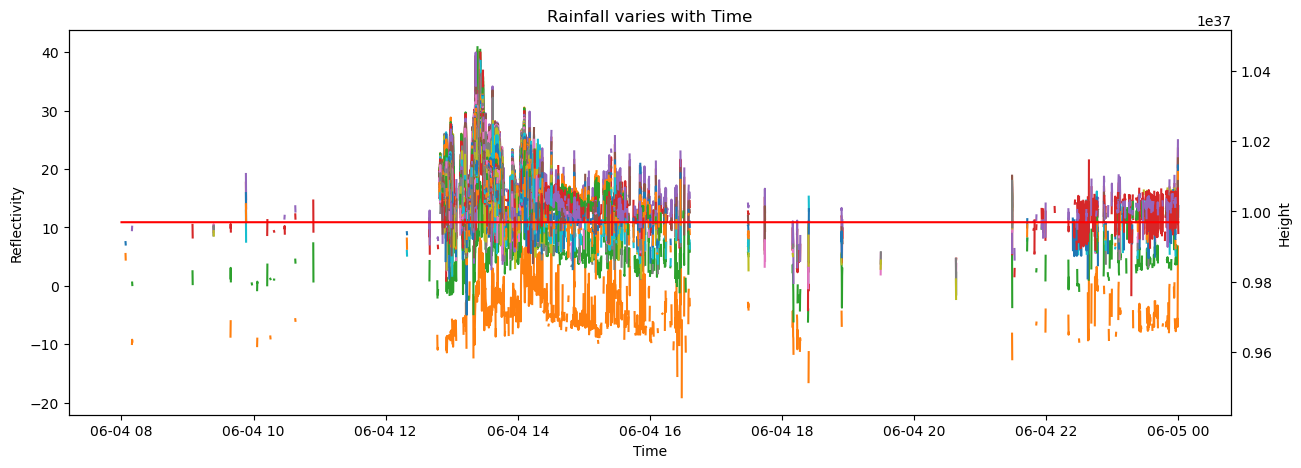

In [29]:
fig,ax = plt.subplots(figsize = (15,5))
ax.plot(time,reflectivity)
ax.set_xlabel('Time'), ax.set_ylabel('Reflectivity')
ax2 = ax.twinx()
ax2.plot(time,height, color = 'red')
ax2.set_ylabel('Height')
ax.set_title('Rainfall varies with Time')
plt.show()